# Image Data Simulation with Gaussian Noise 🖼️

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_noisy_image(true_intensity=128, image_size=(50, 50), mean_noise=0, std_dev_noise=15):
    """
    Simulates a uniform grayscale image with added Gaussian noise.

    Args:
        true_intensity (int): The base intensity of the 'true' image (0-255).
        image_size (tuple): (height, width) of the image in pixels.
        mean_noise (float): The mean of the Gaussian noise.
        std_dev_noise (float): The standard deviation of the Gaussian noise.

    Returns:
        numpy.ndarray: The simulated noisy image.
    """
    height, width = image_size

    # Create the 'true' image (a uniform grayscale image)
    true_image = np.full((height, width), true_intensity, dtype=np.float32)

    # Generate Gaussian noise for each pixel
    # The noise is a 2D array, matching the image size
    gaussian_noise = np.random.normal(mean_noise, std_dev_noise, size=(height, width))

    # Add noise to the true image
    noisy_image = true_image + gaussian_noise

    # Clip values to stay within the 0-255 intensity range and convert to uint8 for display
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

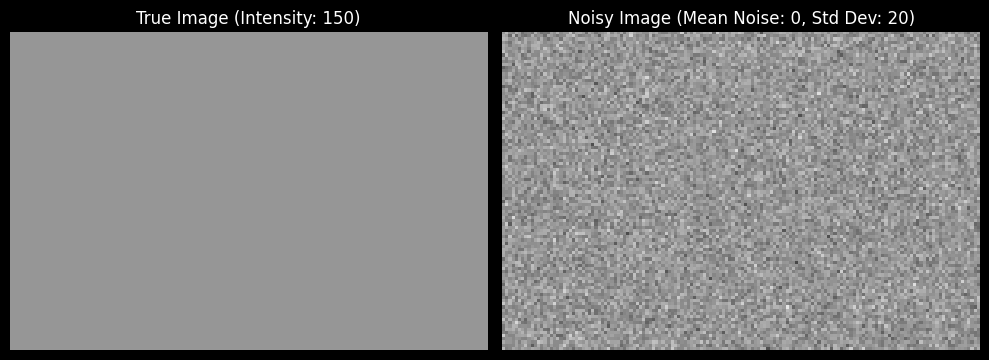

Shape of the simulated noisy image: (100, 150)
Minimum pixel intensity: 71
Maximum pixel intensity: 230
Average pixel intensity: 149.62


In [2]:
# --- Simulation Parameters ---
TRUE_IMAGE_INTENSITY = 150 # A medium gray
IMAGE_DIMENSIONS = (100, 150) # Height x Width
NOISE_MEAN = 0 # Center of the noise distribution
NOISE_STD_DEV = 20 # Spread of the noise distribution

# --- Run Simulation ---
simulated_noisy_image = simulate_noisy_image(
    true_intensity=TRUE_IMAGE_INTENSITY,
    image_size=IMAGE_DIMENSIONS,
    mean_noise=NOISE_MEAN,
    std_dev_noise=NOISE_STD_DEV
)

# --- Plotting ---
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
# Create a 'true' image for comparison (without noise)
plt.imshow(np.full(IMAGE_DIMENSIONS, TRUE_IMAGE_INTENSITY, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title(f"True Image (Intensity: {TRUE_IMAGE_INTENSITY})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(simulated_noisy_image, cmap='gray', vmin=0, vmax=255)
plt.title(f"Noisy Image (Mean Noise: {NOISE_MEAN}, Std Dev: {NOISE_STD_DEV})")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Shape of the simulated noisy image: {simulated_noisy_image.shape}")
print(f"Minimum pixel intensity: {np.min(simulated_noisy_image)}")
print(f"Maximum pixel intensity: {np.max(simulated_noisy_image)}")
print(f"Average pixel intensity: {np.mean(simulated_noisy_image):.2f}")

# Stock Data Simulation with Gaussian Random Walk 📈

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_stock_price(initial_price=100, drift=0.0002, volatility=0.01, num_days=252, num_paths=3):
    """
    Simulates multiple paths of stock prices using a simplified Geometric Brownian Motion.

    Args:
        initial_price (float): The starting stock price.
        drift (float): The average daily return (e.g., 0.0002 for 0.02% daily average growth).
        volatility (float): The standard deviation of daily returns (e.g., 0.01 for 1% daily std dev).
        num_days (int): The number of trading days to simulate.
        num_paths (int): The number of independent stock price paths (realizations) to generate.

    Returns:
        numpy.ndarray: A 2D array where each row is a different stock price path.
    """
    # Create an array to store all simulated paths
    price_paths = np.zeros((num_paths, num_days + 1))
    price_paths[:, 0] = initial_price # Set initial price for all paths

    for i in range(num_paths):
        for t in range(1, num_days + 1):
            # Generate a random daily return from a Gaussian distribution
            # drift*dt is the average movement, volatility*sqrt(dt)*random_number is the random fluctuation
            # Here, dt is 1 day, so sqrt(dt) is 1.
            # We model the logarithm of returns to ensure price stays positive (log-normal)
            daily_log_return = np.random.normal(loc=drift, scale=volatility)
            
            # The next price is the current price multiplied by exp(daily_log_return)
            price_paths[i, t] = price_paths[i, t-1] * np.exp(daily_log_return)
            
            # Simplified additive model (less common for prices, but conceptually shows random walk):
            # price_paths[i, t] = price_paths[i, t-1] + \
            # np.random.normal(loc=drift * price_paths[i, t-1], scale=volatility * price_paths[i, t-1])

    return price_paths

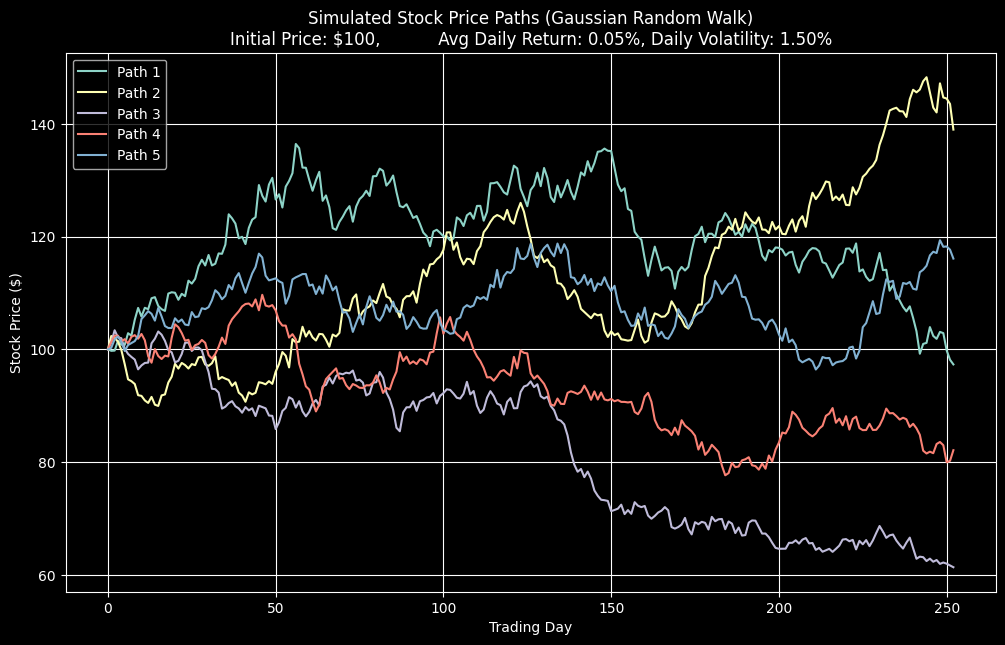

Shape of simulated stock paths: (5, 253) (Num_Paths, Num_Days+1)
Example final prices for each path: [ 97.32 138.98  61.35  82.11 116.1 ]


In [2]:
# --- Simulation Parameters ---
INITIAL_STOCK_PRICE = 100
AVERAGE_DAILY_RETURN = 0.0005  # Corresponds to roughly ~12.6% annual return (0.0005 * 252 trading days)
DAILY_VOLATILITY = 0.015      # Corresponds to roughly ~23.8% annual volatility (0.015 * sqrt(252))
NUMBER_OF_TRADING_DAYS = 252 # Typical number of trading days in a year
NUMBER_OF_SIMULATIONS = 5    # How many different possible futures for the stock

# --- Run Simulation ---
simulated_stock_paths = simulate_stock_price(
    initial_price=INITIAL_STOCK_PRICE,
    drift=AVERAGE_DAILY_RETURN,
    volatility=DAILY_VOLATILITY,
    num_days=NUMBER_OF_TRADING_DAYS,
    num_paths=NUMBER_OF_SIMULATIONS
)

# --- Plotting ---
plt.figure(figsize=(12, 7))
for i in range(NUMBER_OF_SIMULATIONS):
    plt.plot(simulated_stock_paths[i], lw=1.5, label=f'Path {i+1}')

plt.title(f"Simulated Stock Price Paths (Gaussian Random Walk)\nInitial Price: ${INITIAL_STOCK_PRICE},\
           Avg Daily Return: {AVERAGE_DAILY_RETURN*100:.2f}%, Daily Volatility: {DAILY_VOLATILITY*100:.2f}%")
plt.xlabel("Trading Day")
plt.ylabel("Stock Price ($)")
plt.grid(True)
plt.legend()
plt.show()

print(f"Shape of simulated stock paths: {simulated_stock_paths.shape} (Num_Paths, Num_Days+1)")
print(f"Example final prices for each path: {simulated_stock_paths[:, -1].round(2)}")